In [1]:
%load_ext autoreload
%autoreload 2

import sys
from PyPDF2 import PdfFileReader, PdfFileWriter


from spikeA.Dat_file_reader import Dat_file_reader
from scipy import signal
# This sets up our session lists
%run setup_project.py
print("autpipy sessions: {}, spikeA sessions: {}".format(len(myProject.sessionList),len(sSesList)))

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 36 testing sessions in the list
See myProject and sSesList objects
autpipy sessions: 36, spikeA sessions: 36


In [105]:
sSesLocal = get_local_sessions(sSesList)
ip=socket.gethostname()
print("{} sessions are local to {}".format(len(sSesLocal),ip))

30 sessions are local to a230-pc73


In [110]:
def prepareSpikeASession(sSes):
    sSes.load_parameters_from_files() 
for sSes in sSesList:
    prepareSpikeASession(sSes)
#sSes=sSesLocal[5]
#prepareSpikeASession(sSes)

In [112]:
def channels_correlation_matrix(sSes,data_length_sec = 400):
    """
    Function to calculate correlation matrix from the raw signal of the different channels in the .dat files
    
    Arguments:
    sSes: spikeA session
    data_length_sec: how much data to include from the beginning or from the end
    
    Returns:
    corr_matrix
    """
    sampling_rate=int(sSes.sampling_rate)
    data_length = sampling_rate*data_length_sec
    dat_files = [ sSes.path+"/"+i+".dat" for i in sSes.trial_names]
    dfr = Dat_file_reader(dat_files,sSes.n_channels)

    cm = np.load(sSes.path+"/channel_map.npy")
    cp = np.load(sSes.path+"/channel_positions.npy")
    shank = cp[:,0].astype(int)
    depth =  cp[:,1].astype(int)
    ind = cm[:,0].astype(int)
    y_label_list =["{} {} {:02d}".format(s,d,i) for s,d,i in zip(shank,depth,ind)]
    x_label_list =["{} {} {:02d}".format(s,d,i) for s,d,i in zip(shank,depth,ind)]
    dat = dfr.get_data_one_block(20000,20000+data_length,cm.flatten())

    cmat = np.corrcoef(dat)
    
    plt.figure(figsize=(12,12))
    plt.imshow(cmat)
    plt.yticks(np.arange(cmat.shape[0]),y_label_list)
    plt.xticks(np.arange(cmat.shape[0]),x_label_list,rotation='vertical')
    plt.title(sSes.name)
    fn=sSes.path+"/channel_map_corr_matrix.pdf"
    print("saving",fn)
    plt.savefig(fn)
    plt.show()
    plt.close()
    

saving /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/channel_map_corr_matrix.pdf


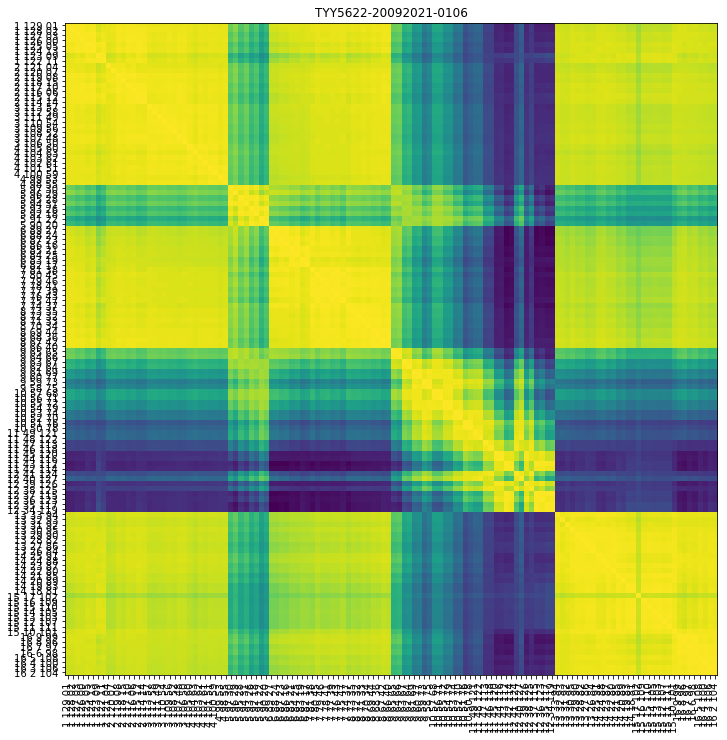

In [113]:
channels_correlation_matrix(sSes)

  0%|                                                    | 0/36 [00:00<?, ?it/s]

saving /adata/projects/autopi_ca1/mn5824/mn5824-20112020-0107/channel_map_corr_matrix.pdf


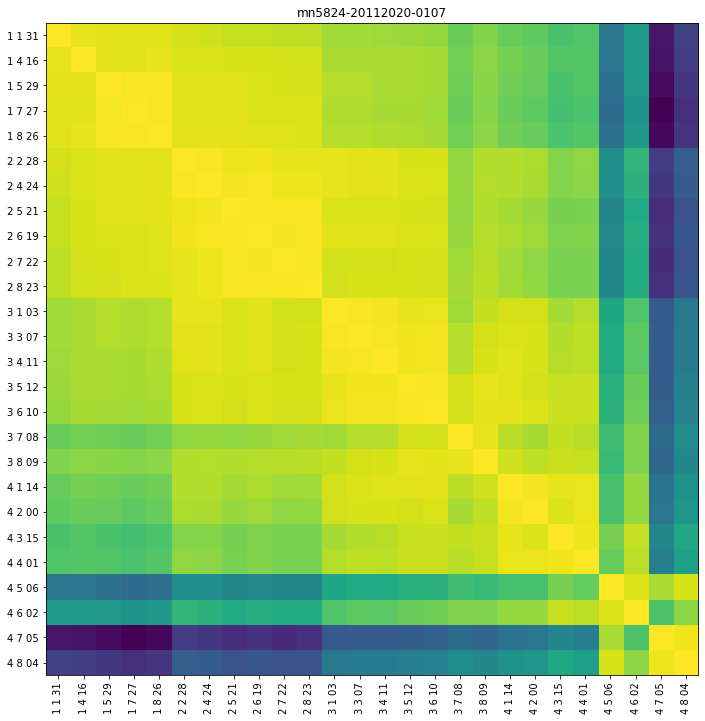

  3%|█▏                                          | 1/36 [00:04<02:44,  4.70s/it]

saving /adata/projects/autopi_ca1/mn5824/mn5824-22112020-0107/channel_map_corr_matrix.pdf


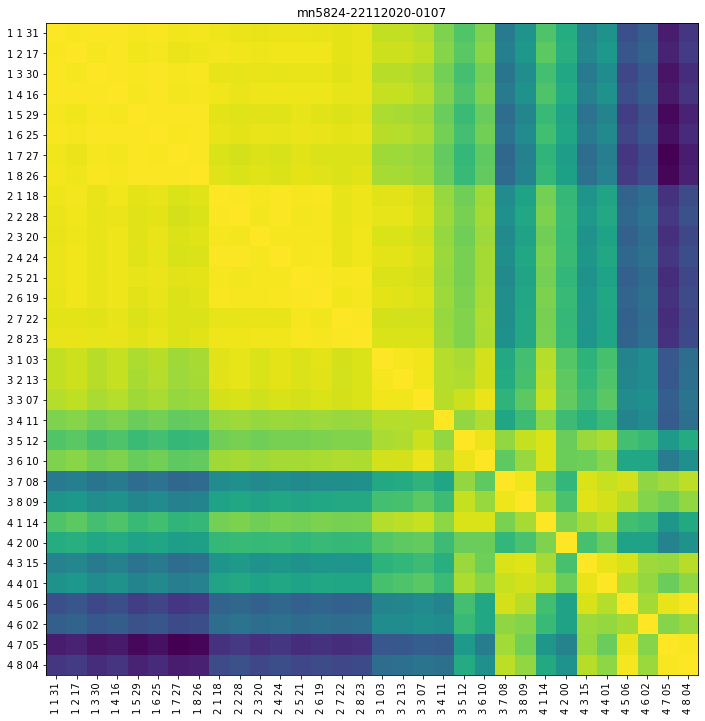

  6%|██▍                                         | 2/36 [00:09<02:44,  4.85s/it]

saving /adata/projects/autopi_ca1/mn5824/mn5824-24112020-0107/channel_map_corr_matrix.pdf


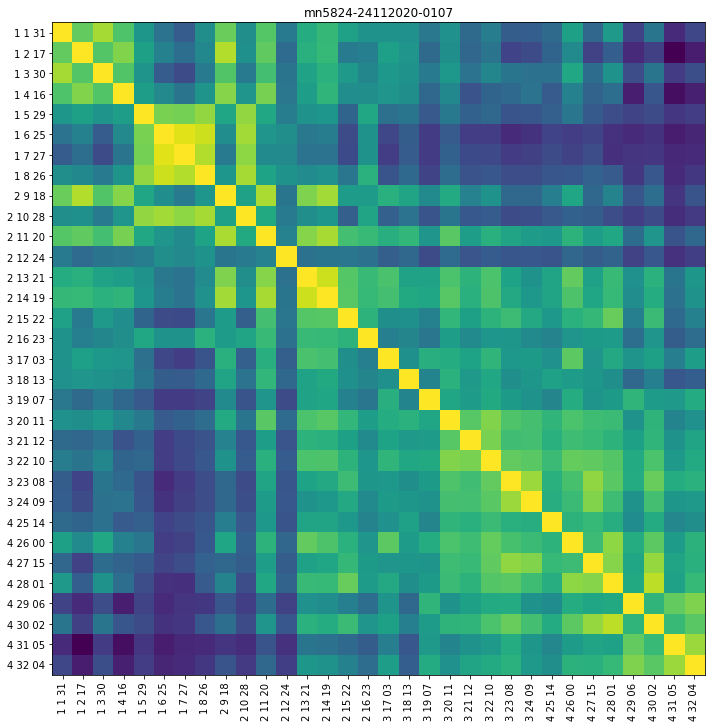

  8%|███▋                                        | 3/36 [00:14<02:43,  4.97s/it]

saving /adata/projects/autopi_ca1/mn5824/mn5824-02122020-0106/channel_map_corr_matrix.pdf


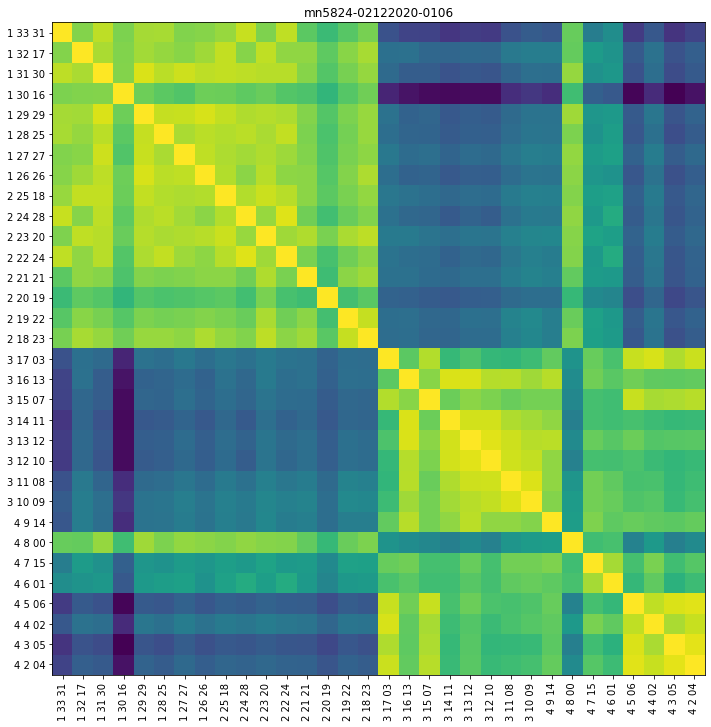

 11%|████▉                                       | 4/36 [00:19<02:38,  4.97s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-28012021-0106/channel_map_corr_matrix.pdf


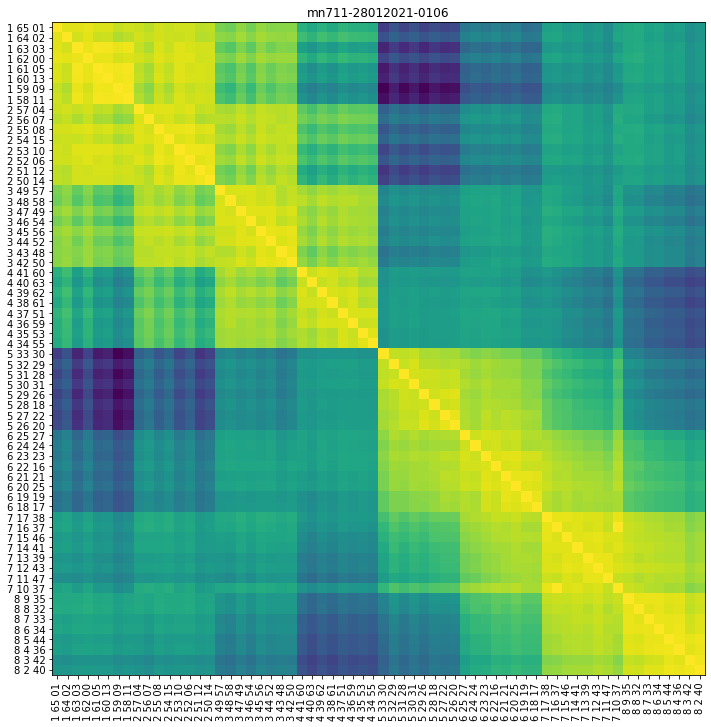

 14%|██████                                      | 5/36 [00:31<03:47,  7.33s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-30012021-0106/channel_map_corr_matrix.pdf


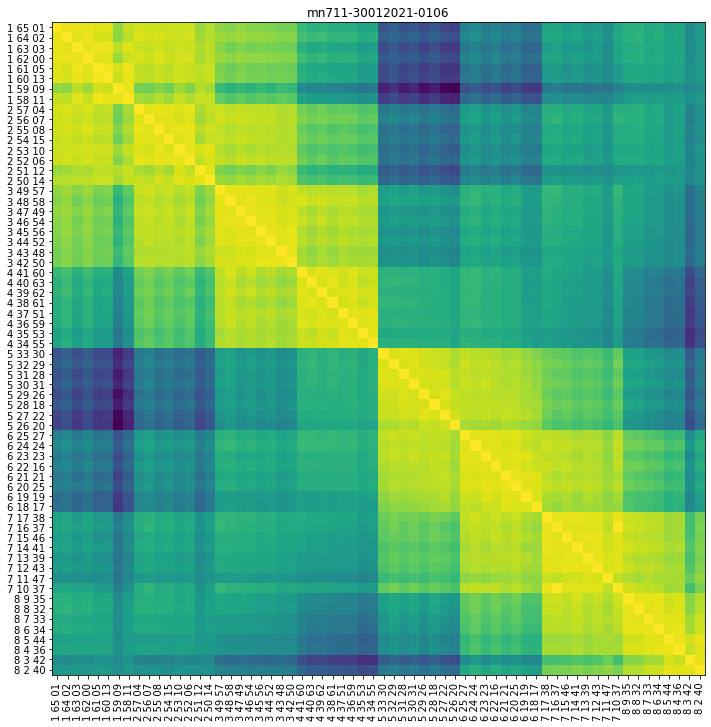

 17%|███████▎                                    | 6/36 [00:42<04:23,  8.78s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-31012021-0107/channel_map_corr_matrix.pdf


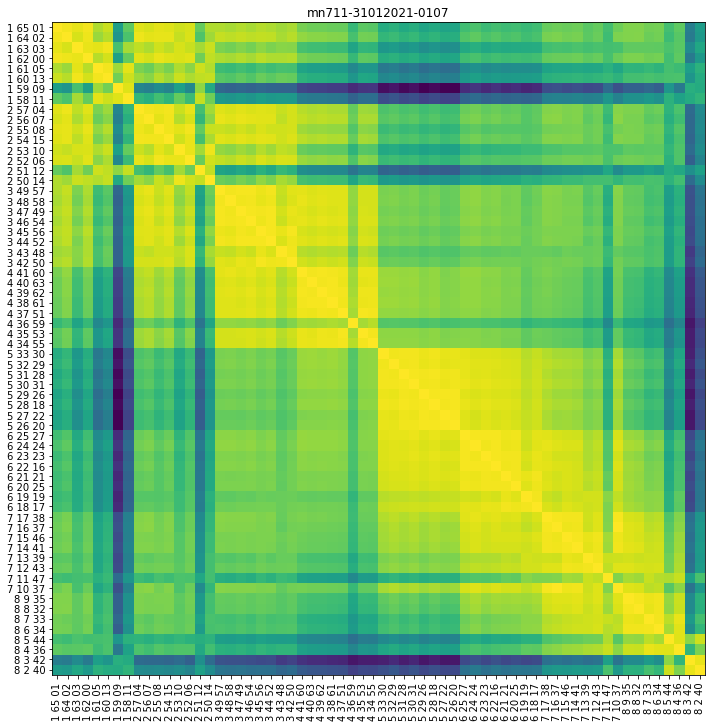

 19%|████████▌                                   | 7/36 [00:53<04:36,  9.53s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-01022021-0107/channel_map_corr_matrix.pdf


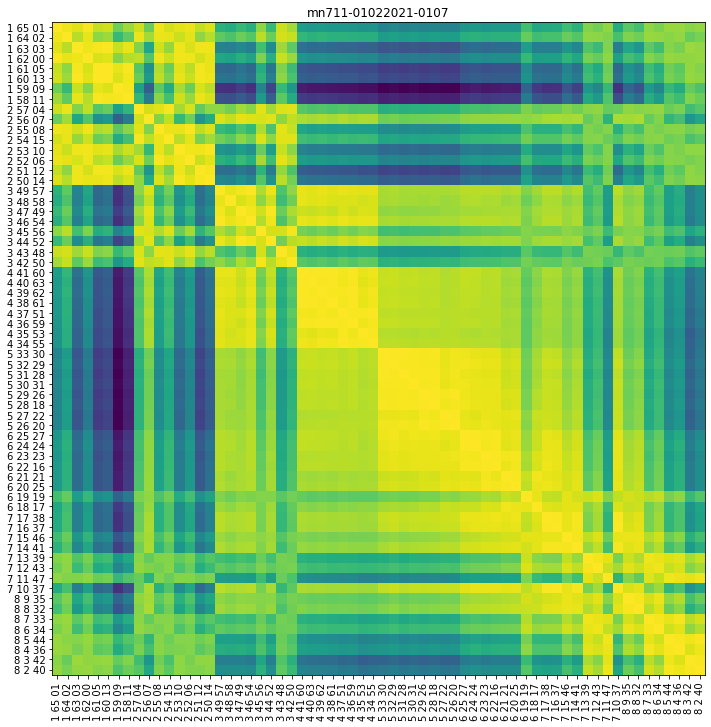

 22%|█████████▊                                  | 8/36 [01:04<04:38,  9.96s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-02022021-0108/channel_map_corr_matrix.pdf


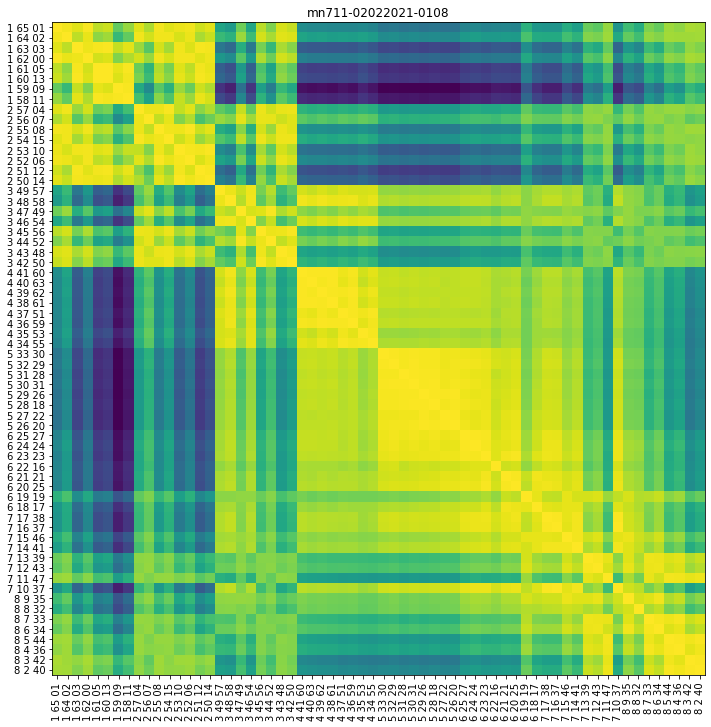

 25%|███████████                                 | 9/36 [01:15<04:38, 10.32s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-03022021-0107/channel_map_corr_matrix.pdf


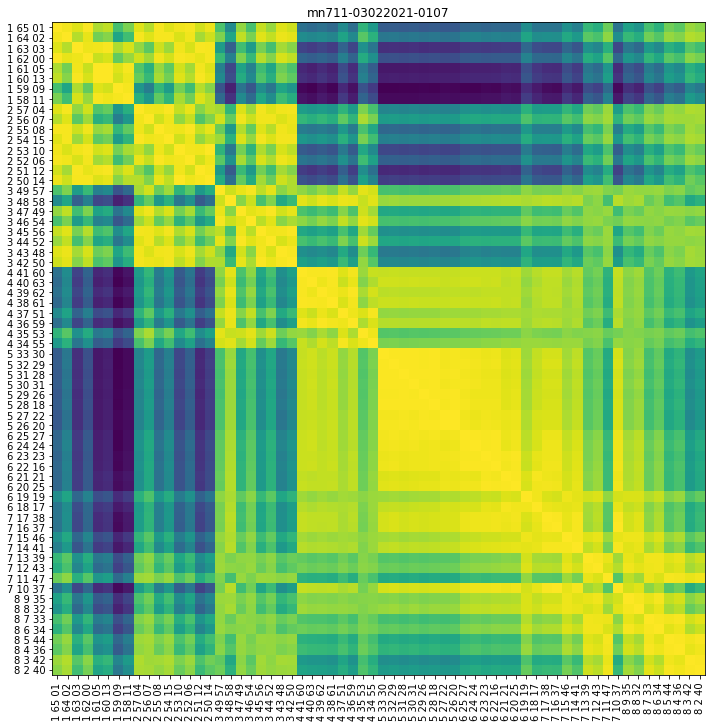

 28%|███████████▉                               | 10/36 [01:27<04:41, 10.81s/it]

saving /adata/projects/autopi_ca1/mn711/mn711-04022021-0107/channel_map_corr_matrix.pdf


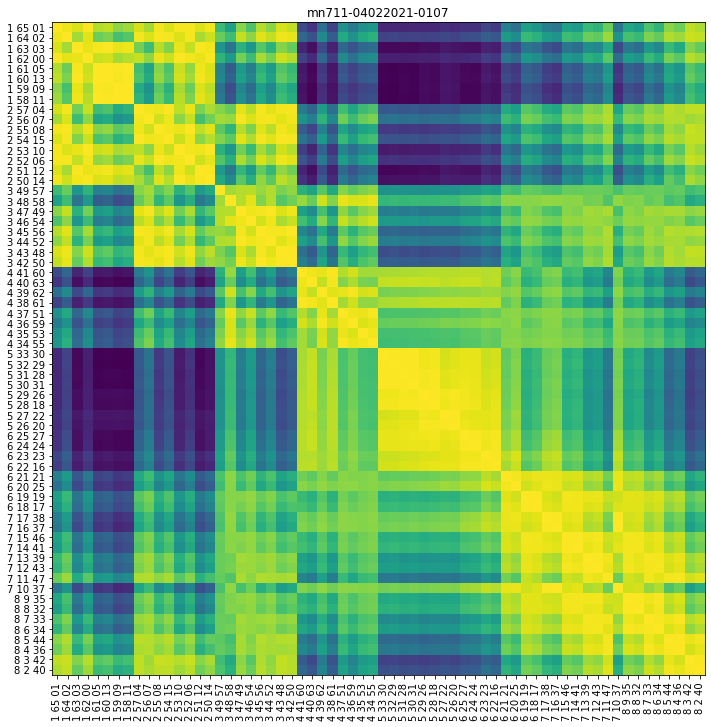

 31%|█████████████▏                             | 11/36 [01:39<04:35, 11.03s/it]

saving /adata/projects/autopi_ca1/mn2739/mn2739-11022021-0107/channel_map_corr_matrix.pdf


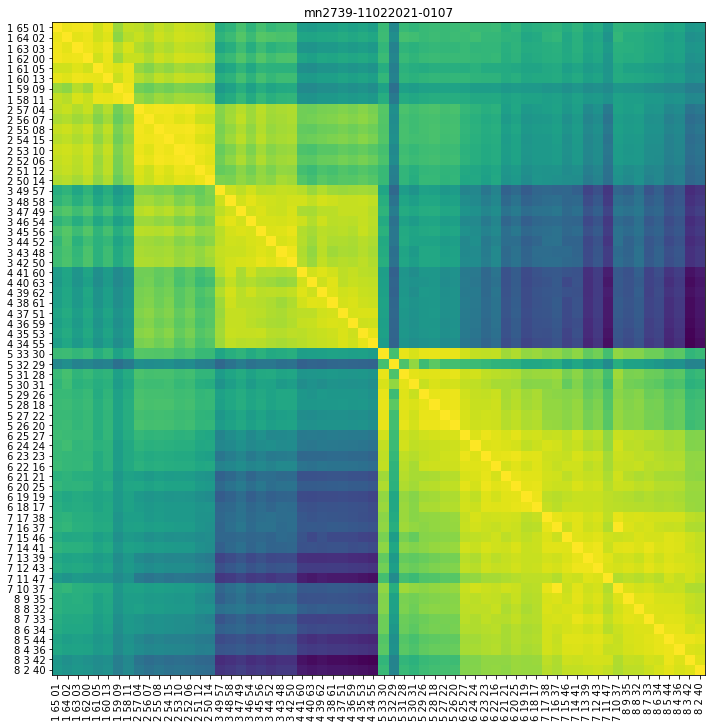

 33%|██████████████▎                            | 12/36 [01:49<04:19, 10.82s/it]

saving /adata/projects/autopi_ca1/mn2739/mn2739-15022021-0105/channel_map_corr_matrix.pdf


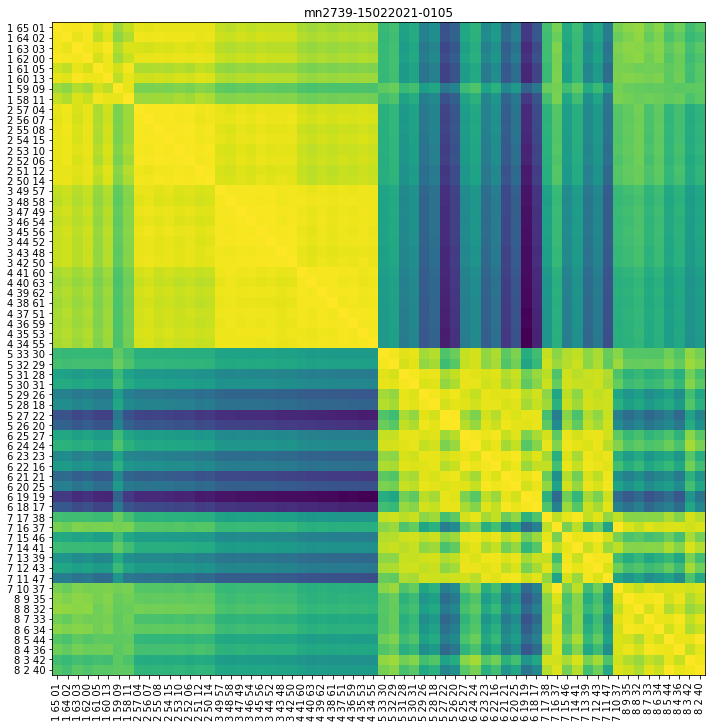

 36%|███████████████▌                           | 13/36 [02:01<04:12, 10.98s/it]

saving /adata/projects/autopi_ca1/mn2739/mn2739-16022021-0106/channel_map_corr_matrix.pdf


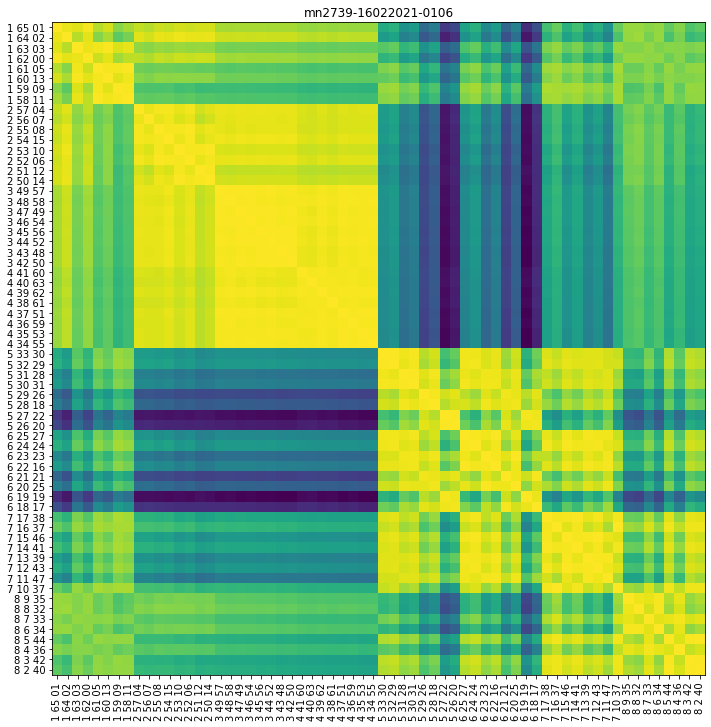

 39%|████████████████▋                          | 14/36 [02:12<04:03, 11.08s/it]

saving /adata/projects/autopi_ca1/mn2739/mn2739-17022021-0106/channel_map_corr_matrix.pdf


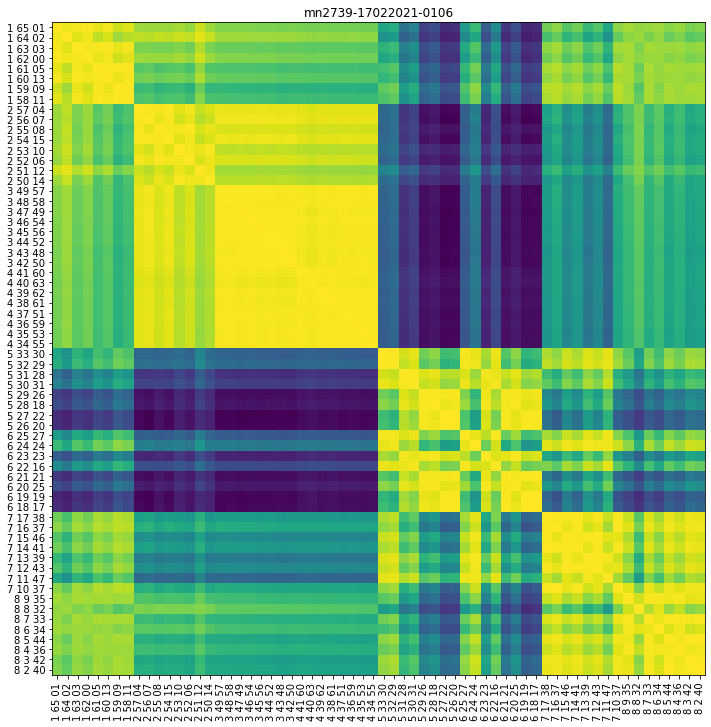

 42%|█████████████████▉                         | 15/36 [02:24<03:58, 11.38s/it]

saving /adata/projects/autopi_ca1/mn2739/mn2739-21022021-0106/channel_map_corr_matrix.pdf


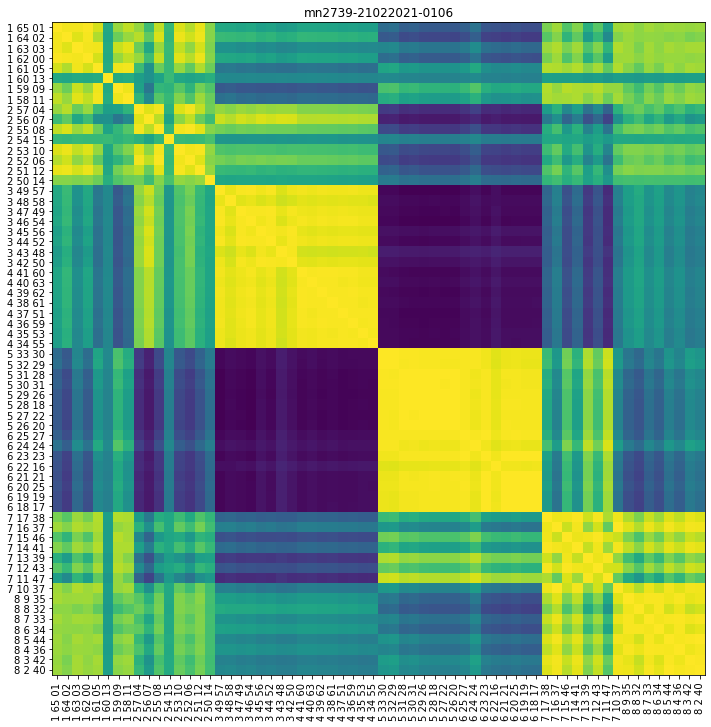

 44%|███████████████████                        | 16/36 [02:36<03:50, 11.54s/it]

saving /adata/projects/autopi_ca1/mn3246/mn3246-09042021-0106/channel_map_corr_matrix.pdf


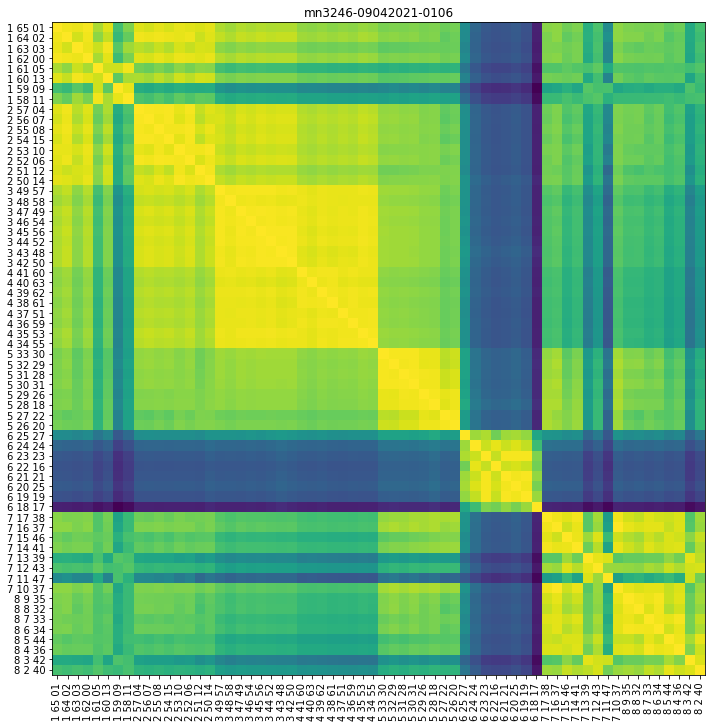

 47%|████████████████████▎                      | 17/36 [02:49<03:46, 11.93s/it]

saving /adata/projects/autopi_ca1/mn3246/mn3246-10042021-0106/channel_map_corr_matrix.pdf


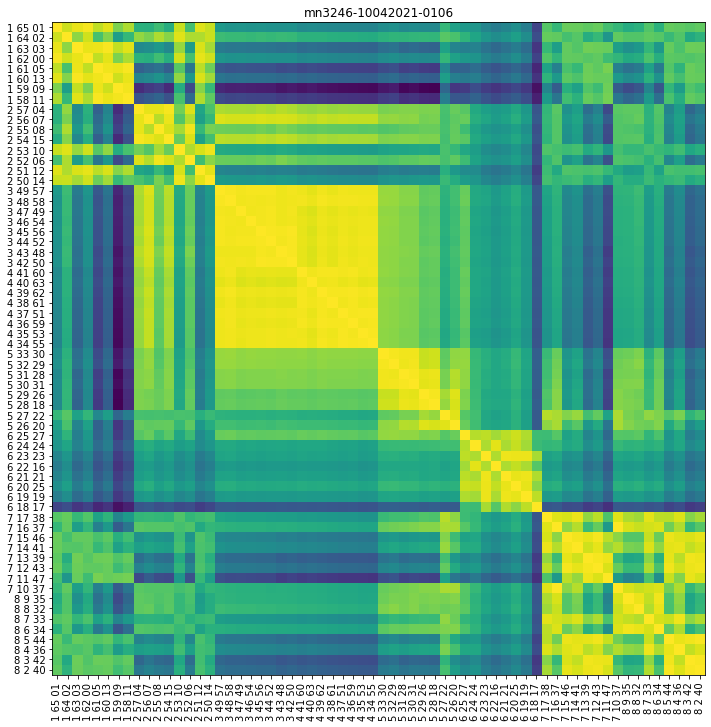

 50%|█████████████████████▌                     | 18/36 [03:03<03:45, 12.52s/it]

saving /adata/projects/autopi_ca1/mn3246/mn3246-12042021-0106/channel_map_corr_matrix.pdf


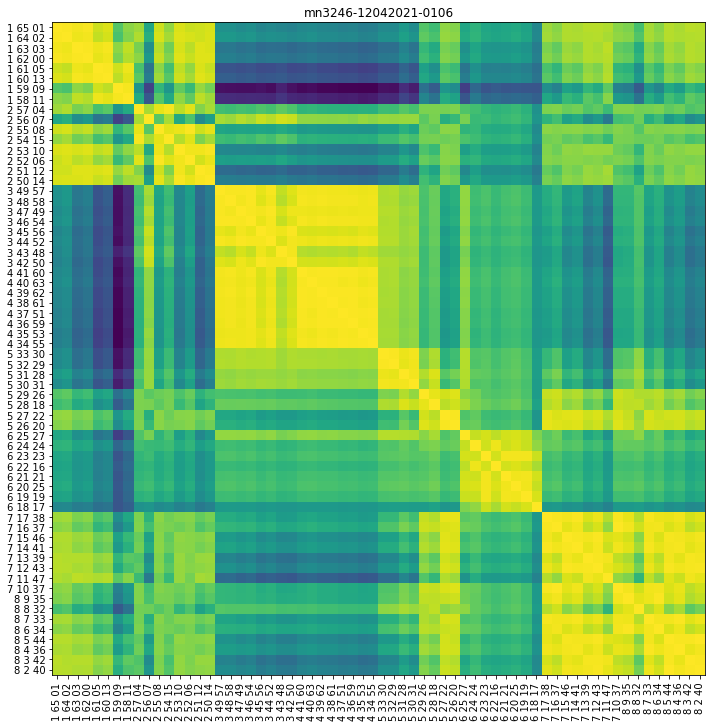

 53%|██████████████████████▋                    | 19/36 [03:17<03:44, 13.19s/it]

saving /adata/projects/autopi_ca1/mn3246/mn3246-14042021-0106/channel_map_corr_matrix.pdf


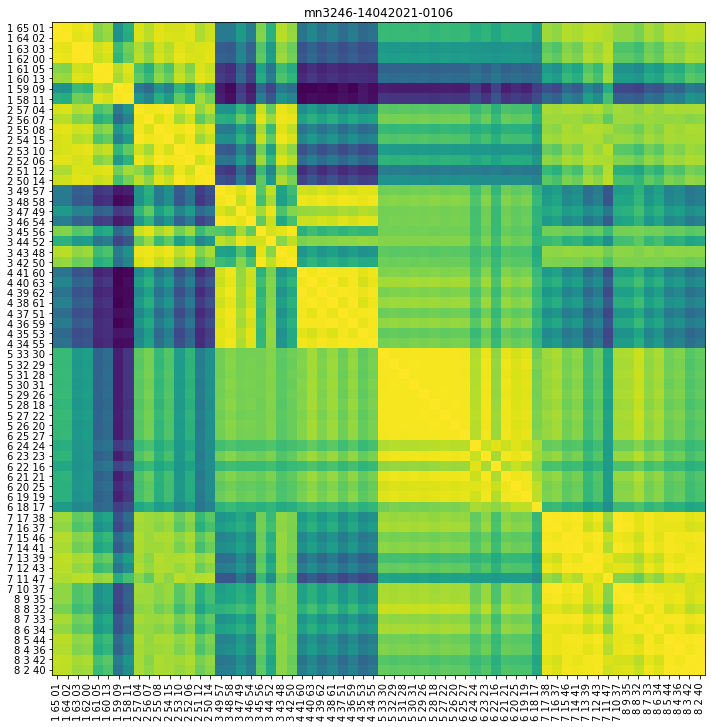

 56%|███████████████████████▉                   | 20/36 [03:33<03:42, 13.90s/it]

saving /adata/projects/autopi_ca1/mn1173/mn1173-02052021-0107/channel_map_corr_matrix.pdf


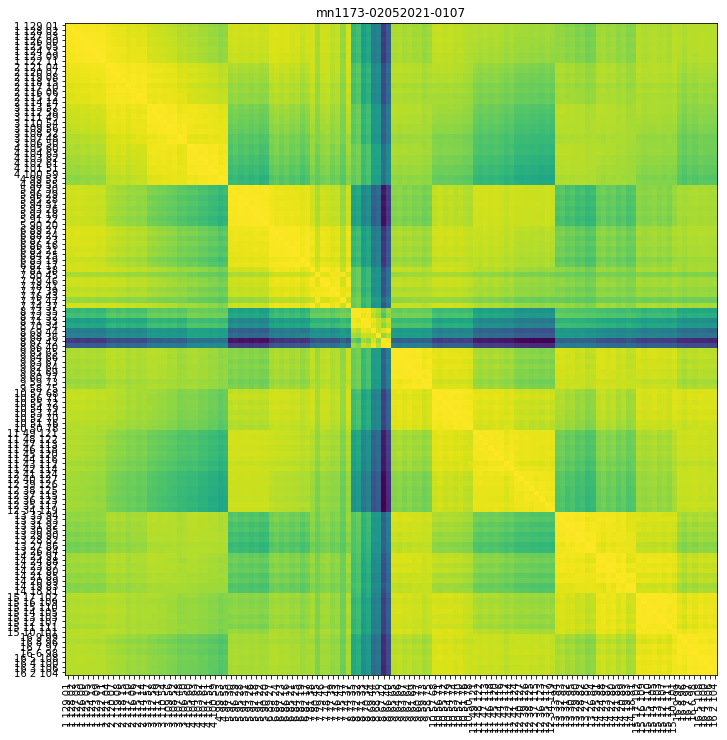

 58%|█████████████████████████                  | 21/36 [03:58<02:50, 11.34s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/adata/projects/autopi_ca1/mn1173/mn1173-06052021-0107/channel_map.npy'

In [114]:
for sSes in tqdm(sSesList):
    channels_correlation_matrix(sSes)